In [16]:
import magpylib as magpy
import matplotlib.pyplot as plt
import numpy as np
%config InlineBackend.figure_format = "retina"

In [2]:
def monopole_field(charge, position):
    """monopole field"""
    position = np.array(position)
    dist = np.linalg.norm(position, axis=1)
    return charge * (position.T / dist**3).T

In [5]:
# prepare a custom 3D model
trace_pole = magpy.graphics.model3d.make_Ellipsoid(backend="matplotlib", dimension=(0.3, 0.3, 0.3))

In [6]:
# combine four monopole custom sources into a quadrupole collection
def create_pole(charge):
    """create a monopole object"""
    field = lambda field, observers: monopole_field(charge, observers)
    monopole = magpy.misc.CustomSource(field_func=field, style_model3d_showdefault=False)
    monopole.style.model3d.add_trace(trace_pole)
    return monopole

In [7]:
quadrupole = magpy.Collection(*[create_pole(q) for q in [1, 1, -1, -1]])

In [12]:
# move and color the pole objects
pole_pos = np.array([(1, 0, 0), (-1, 0, 0), (0, 0, 1), (0, 0, -1)])
for pole, pos, col in zip(quadrupole, pole_pos, "rrbb"):
    pole.position = pos
    pole.style.color = col

In [13]:
# compute B-field on xz-grid and display in ax2
ts = np.linspace(-3, 3, 30)
grid = np.array([[(x, 0, z) for x in ts] for z in ts])
B = quadrupole.getB(grid)

/var/folders/qh/_90_vgwx2v9020gsml9y554r0000gn/T/ipykernel_67247/2128530377.py:5: RuntimeWarning: invalid value encountered in divide
  return charge * (position.T / dist**3).T


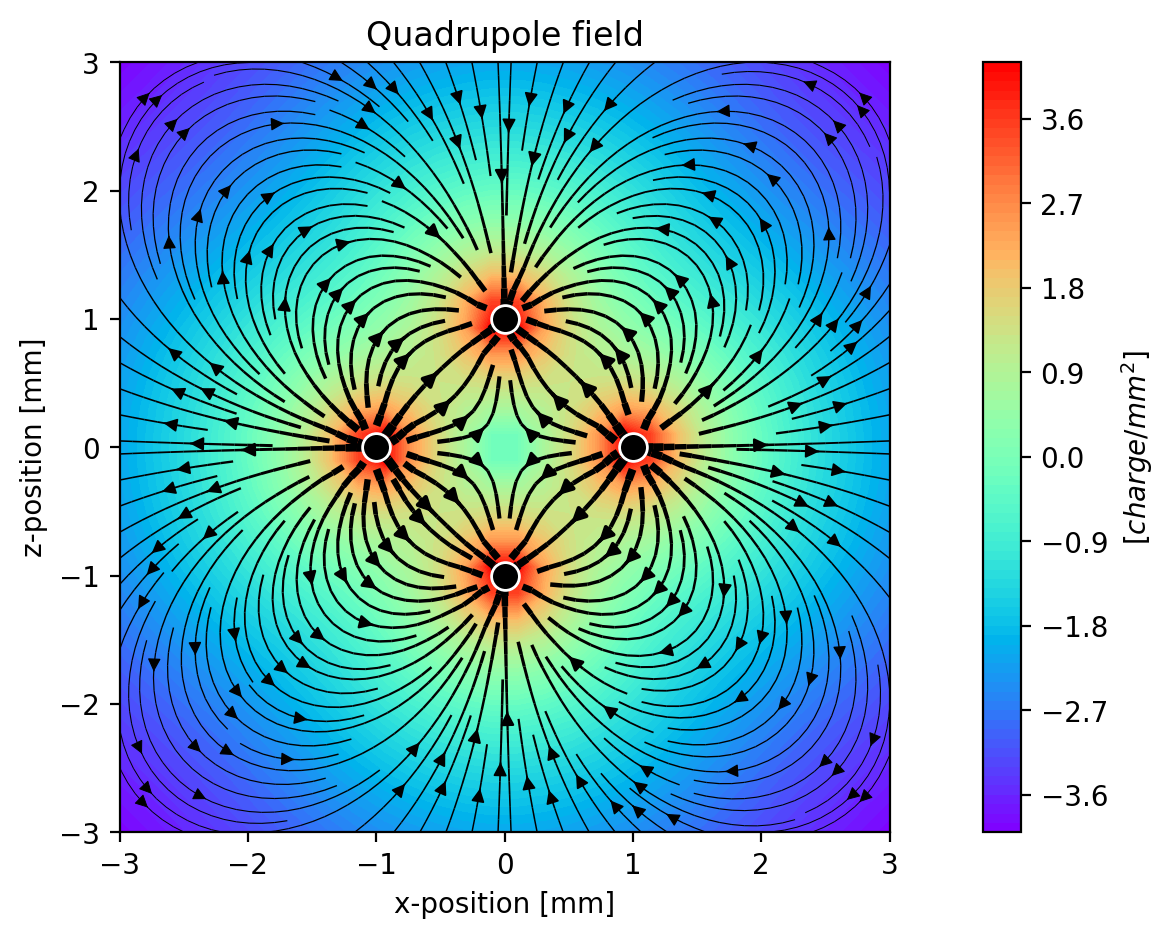

In [17]:
# Matplotlib figure
fig = plt.figure(figsize=(12, 5))
# ax1 = fig.add_subplot(121, projection="3d", azim=-80, elev=15,)
ax2 = fig.add_subplot()


scale = np.linalg.norm(B, axis=2)
cp = ax2.contourf(grid[:, :, 0], grid[:, :, 2], np.log(scale), levels=100, cmap="rainbow")
ax2.streamplot(grid[:, :, 0], grid[:, :, 2], B[:, :, 0], B[:, :, 2], density=2, color="k", linewidth=scale**0.3)

# display pole positions in ax2
ax2.plot(pole_pos[:, 0], pole_pos[:, 2], marker="o", ms=10, mfc="k", mec="w", ls="")
ax2.set(title="Quadrupole field", xlabel="x-position [mm]", ylabel="z-position [mm]", aspect=1)
fig.colorbar(cp, label='[$charge/mm^2$]', ax=ax2)